In [1]:
from pysr import *
import numpy as np
import matplotlib.pyplot as plt
from classy import Class
from scipy.stats import qmc

In [2]:
nm = 10
nk = 100
nz = 20
nas = 20
nns = 20
nob = 20
noc = 20
nh = 20
nc = 200

nmv = 21
nkv = 201
nzv = 41
nasv = 41
nnsv = 41
nobv = 41
nocv = 41
nhv = 41
ncv = 301

In [3]:
kk = np.load('../files/scale_[' + str(nk) + '].npy')
zz = np.load('../files/redshift_[' + str(nz) + '].npy')

kkv = np.load('../files/scale_[' + str(nkv) + '].npy')
zzv = np.load('../files/redshift_[' + str(nzv) + '].npy')

# Modello base: $m,k,z$

In [4]:
ni = 4000
comp = 40
pop = 120

model_mu = PySRRegressor().from_file('../models/mu(' +str(ni)+ ',' +str(comp)+ ',' +str(pop)+ ').pkl')
print(model_mu.get_best())
print(model_mu.latex())

Checking if ../models/mu(4000,40,120).pkl exists...
Loading model from ../models/mu(4000,40,120).pkl
complexity                                                      36
loss                                                           0.0
score                                                      0.07701
equation         ((((x2 + (x1 ^ 0.69644684)) ^ 1.31768) - (-1.0...
sympy_format     (-x1 + (x1**0.69644684 + x2)**1.31768 + 1.0277...
lambda_format    PySRFunction(X=>(-x1 + (x1**0.69644684 + x2)**...
Name: 27, dtype: object
\left(- x_{1} + \left(x_{1}^{0.696} + x_{2}\right)^{1.32} + 1.03\right)^{- 0.0310 x_{0}^{1.00^{\frac{1}{x_{1}^{0.646} \log{\left(x_{1} \right)}}}} \left(0.0763 \cdot 0.333^{x_{1}} + 0.0763 x_{1}\right)^{\frac{x_{1}}{x_{0}}}}


$ \left(\left(0.146^{0.103^{e^{\left(0.103 x_{2}\right)^{x_{2}}} + \frac{1.24 x_{1}}{x_{0}}}}\right)^{0.146 x_{1} + 0.146 x_{2}^{0.589}}\right)^{x_{0}^{0.939}} $

In [5]:
# preparo il plot delle differenze con il training dataset

data = np.load('../files/data_[' +str(nm)+ ',' +str(nk)+ ',' +str(nz)+ '].npy')

diffk = np.zeros([nm*nz,nk])
diffz = np.zeros([nm*nk,nz])

# i datset generati contengono già tutte le combinazioni dei parametri cosmologici
# perciò li riordino secondo la variabile di interesse (qui k) e prendo da essi tutte le combinazioni
testk = data[np.argsort(data[:, 1])]
for i in range(nk) :
    diffk[:,i] = 100*np.abs(1-model_mu.predict(testk[i*nm*nz:i*nm*nz+nm*nz,:-1])/testk[i*nm*nz:i*nm*nz+nm*nz,-1])
diffk = np.sort(diffk, axis=0)

testz = data[np.argsort(data[:, 2])]
for i in range(nz) :
    diffz[:,i] = 100*np.abs(1-model_mu.predict(testz[i*nm*nk:i*nm*nk+nm*nk,:-1])/testz[i*nm*nk:i*nm*nk+nm*nk,-1])
diffz = np.sort(diffz, axis=0)


In [6]:
# preparo il plot delle differenze con il validation dataset

data_v = np.load('../files/data-val_[' +str(nmv)+ ',' +str(nkv)+ ',' +str(nzv)+ '].npy')

diffk_v = np.zeros([nmv*nzv,nkv])
diffz_v = np.zeros([nmv*nkv,nzv])

# i datset generati contengono già tutte le combinazioni dei parametri cosmologici
# perciò li riordino secondo la variabile di interesse (qui k) e prendo da essi tutte le comcinazioni
testk_v = data_v[np.argsort(data_v[:, 1])]
for i in range(nkv) :
    diffk_v[:,i] = 100*np.abs(1-model_mu.predict(testk_v[i*nmv*nzv:i*nmv*nzv+nmv*nzv,:-1])/testk_v[i*nmv*nzv:i*nmv*nzv+nmv*nzv,-1])
diffk_v = np.sort(diffk_v, axis=0)

testz_v = data_v[np.argsort(data_v[:, 2])]
for i in range(nzv) :
    diffz_v[:,i] = 100*np.abs(1-model_mu.predict(testz_v[i*nmv*nkv:i*nmv*nkv+nmv*nkv,:-1])/testz_v[i*nmv*nkv:i*nmv*nkv+nmv*nkv,-1])
diffz_v = np.sort(diffz_v, axis=0)


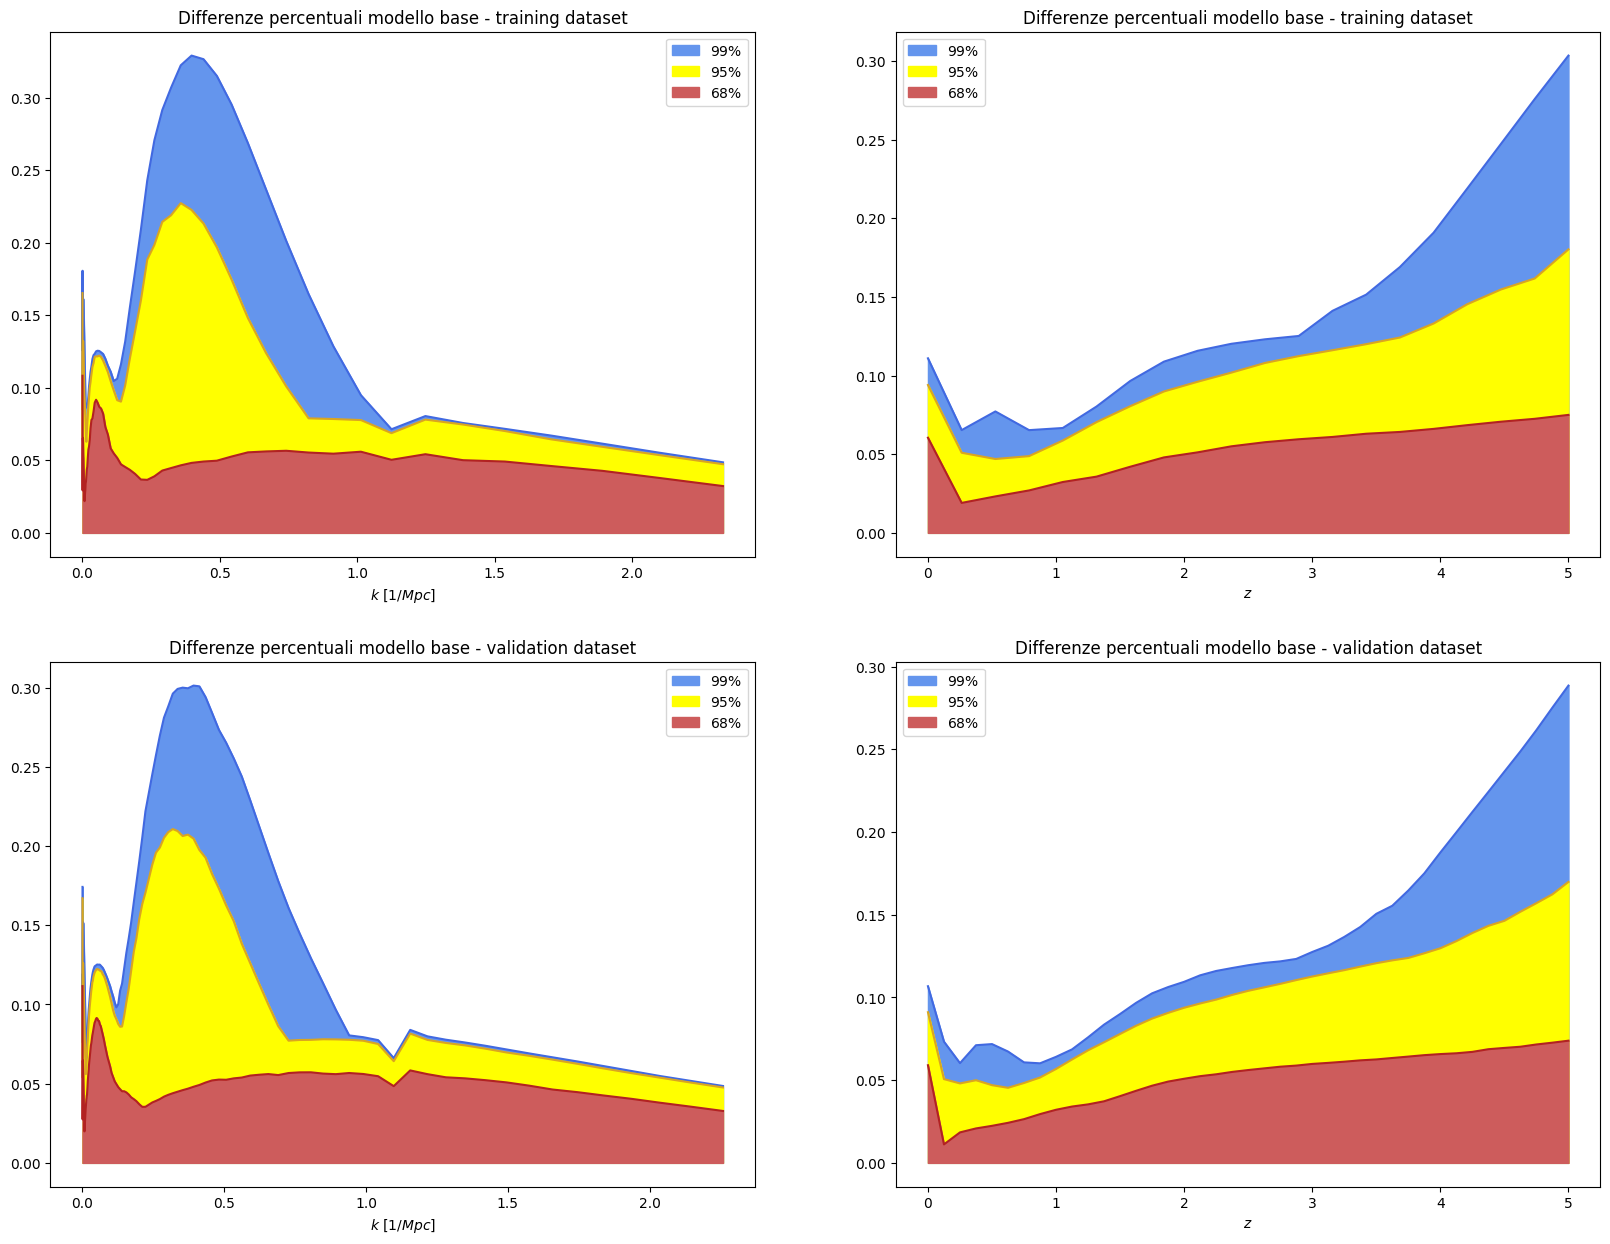

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

x = [[kk, zz], [kkv, zzv]]
diff = [[diffk, diffz], [diffk_v, diffz_v]]

for i in range(2) :
    for j in range(2) :
        ind99 = int((diff[i][j].shape[0]/100)*99)
        axs[i,j].plot(x[i][j], diff[i][j][ind99,:], color='royalblue')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind99,:], color='cornflowerblue', label='$99\%$')

        ind95 = int((diff[i][j].shape[0]/100)*95)
        axs[i,j].plot(x[i][j], diff[i][j][ind95,:], color='goldenrod')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind95,:], color='yellow', label='$95\%$')

        ind68 = int((diff[i][j].shape[0]/100)*68)
        axs[i,j].plot(x[i][j], diff[i][j][ind68,:], color='firebrick')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind68,:], color='indianred', label='$68\%$')

        axs[i,j].legend()
        axs[0,j].set_title('Differenze percentuali modello base - training dataset')
        axs[1,j].set_title('Differenze percentuali modello base - validation dataset')
        
        axs[i,0].set_xlabel('$k \ [1/Mpc]$')
        axs[i,1].set_xlabel('$z$')

plt.savefig('../plots/diff.pdf')
plt.show()

# Modello con $A_s$ e $n_s$

**100 iterazioni**

In [8]:
ni = 100
comp = 20
pop = 50

model_asns1 = PySRRegressor().from_file('../models/mu_asns(' +str(ni)+ ',' +str(comp)+ ',' +str(pop)+ ').pkl')
print(model_asns1.get_best())
print(model_asns1.latex())

Checking if ../models/mu_asns(100,20,50).pkl exists...
Loading model from ../models/mu_asns(100,20,50).pkl
complexity                                                      18
loss                                                      0.000003
score                                                     0.225528
equation         ((x2 + (x2 + exp(x2 ^ x4))) ^ ((-0.015742965 *...
sympy_format     (2*x2 + exp(x2**x4))**(-0.015742965*0.22472599...
lambda_format    PySRFunction(X=>(2*x2 + exp(x2**x4))**(-0.0157...
Name: 11, dtype: object
\left(2 x_{2} + e^{x_{2}^{x_{4}}}\right)^{- 0.0157 \cdot 0.225^{\frac{x_{1}}{x_{0}}} x_{0}}


* $x_0 = m_\nu$
* $x_1 = k$ 
* $x_2 = z$
* $x_3 = A_s$
* $x_4 = n_s$

$ \mu(k,z) = \left(2 x_{2} + e^{x_{2}^{x_{4}}}\right)^{- 0.0157 \cdot 0.225^{\frac{x_{1}}{x_{0}}} x_{0}} $

In [66]:
# preparo il plot delle differenze con il training dataset
'''
data_asns1 = np.load('../files/data_asns_[' +str(nm)+ ',' +str(nk)+ ',' +str(nz)+ ',' +str(nas)+ ',' +str(nns)+ '].npy')

diffk_asns1 = np.zeros([nm*nas*nns*nz,nk])
diffz_asns1 = np.zeros([nm*nas*nns*nk,nz])

testk_asns1 = data_asns1[np.argsort(data_asns1[:, 1])]
for i in range(nk) :
    diffk_asns1[:,i] = 100*np.abs(1-model_asns1.predict(testk_asns1[i*nm*nas*nns*nz:i*nm*nas*nns*nz+nm*nas*nns*nz,:-1])/testk_asns1[i*nm*nas*nns*nz:i*nm*nas*nns*nz+nm*nas*nns*nz,-1])
diffk_asns1 = np.sort(diffk_asns1, axis=0)

testz_asns1 = data_asns1[np.argsort(data_asns1[:, 2])]
for i in range(nz) :
    diffz_asns1[:,i] = 100*np.abs(1-model_asns1.predict(testz_asns1[i*nm*nas*nns*nk:i*nm*nas*nns*nk+nm*nas*nns*nk,:-1])/testz_asns1[i*nm*nas*nns*nk:i*nm*nas*nns*nk+nm*nas*nns*nk,-1])
diffz_asns1 = np.sort(diffz_asns1, axis=0)
'''

In [67]:
# preparo il plot delle differenze con il validation dataset
'''
data_asns1_v = np.load('../files/data-val_asns_[' +str(nmv)+ ',' +str(nkv)+ ',' +str(nzv)+ ',' +str(nasv)+ ',' +str(nnsv)+ '].npy')

diffk_asns1_v = np.zeros([nmv*nasv*nnsv*nzv,nkv])
diffz_asns1_v = np.zeros([nmv*nasv*nnsv*nkv,nzv])

testk_asns1_v = data_asns1_v[np.argsort(data_asns1_v[:, 1])]
for i in range(nkv) :
    diffk_asns1_v[:,i] = 100*np.abs(1-model_asns1.predict(testk_asns1_v[i*nmv*nasv*nnsv*nzv:i*nmv*nasv*nnsv*nzv+nmv*nasv*nnsv*nzv,:-1])/testk_asns1_v[i*nmv*nasv*nnsv*nzv:i*nmv*nasv*nnsv*nzv+nmv*nasv*nnsv*nzv,-1])
diffk_asns1_v = np.sort(diffk_asns1_v, axis=0)

testz_asns1_v = data_asns1_v[np.argsort(data_asns1_v[:, 2])]
for i in range(nzv) :
    diffz_asns1_v[:,i] = 100*np.abs(1-model_asns1.predict(testz_asns1_v[i*nmv*nasv*nnsv*nkv:i*nmv*nasv*nnsv*nkv+nmv*nasv*nnsv*nkv,:-1])/testz_asns1_v[i*nmv*nasv*nnsv*nkv:i*nmv*nasv*nnsv*nkv+nmv*nasv*nnsv*nkv,-1])
diffz_asns1_v = np.sort(diffz_asns1_v, axis=0)
'''

"\ndata_asns1_v = np.load('files/data-val_asns_[' +str(nmv)+ ',' +str(nkv)+ ',' +str(nzv)+ ',' +str(nasv)+ ',' +str(nnsv)+ '].npy')\n\ndiffk_asns1_v = np.zeros([nmv*nasv*nnsv*nzv,nkv])\ndiffz_asns1_v = np.zeros([nmv*nasv*nnsv*nkv,nzv])\n\ntestk_asns1_v = data_asns1_v[np.argsort(data_asns1_v[:, 1])]\nfor i in range(nkv) :\n    diffk_asns1_v[:,i] = 100*np.abs(1-model_asns1.predict(testk_asns1_v[i*nmv*nasv*nnsv*nzv:i*nmv*nasv*nnsv*nzv+nmv*nasv*nnsv*nzv,:-1])/testk_asns1_v[i*nmv*nasv*nnsv*nzv:i*nmv*nasv*nnsv*nzv+nmv*nasv*nnsv*nzv,-1])\ndiffk_asns1_v = np.sort(diffk_asns1_v, axis=0)\n\ntestz_asns1_v = data_asns1_v[np.argsort(data_asns1_v[:, 2])]\nfor i in range(nzv) :\n    diffz_asns1_v[:,i] = 100*np.abs(1-model_asns1.predict(testz_asns1_v[i*nmv*nasv*nnsv*nkv:i*nmv*nasv*nnsv*nkv+nmv*nasv*nnsv*nkv,:-1])/testz_asns1_v[i*nmv*nasv*nnsv*nkv:i*nmv*nasv*nnsv*nkv+nmv*nasv*nnsv*nkv,-1])\ndiffz_asns1_v = np.sort(diffz_asns1_v, axis=0)\n"

In [68]:
'''
fig, axs = plt.subplots(2, 2, figsize=(20, 15), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

x = [[kk, zz], [kkv, zzv]]
diff = [[diffk_asns1, diffz_asns1], [diffk_asns1_v, diffz_asns1_v]]

for i in range(2) :
    for j in range(2) :
        ind99 = int((diff[i][j].shape[0]/100)*99)
        axs[i,j].plot(x[i][j], diff[i][j][ind99,:], color='royalblue')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind99,:], color='cornflowerblue', label='$99\%$')

        ind95 = int((diff[i][j].shape[0]/100)*95)
        axs[i,j].plot(x[i][j], diff[i][j][ind95,:], color='goldenrod')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind95,:], color='yellow', label='$95\%$')

        ind68 = int((diff[i][j].shape[0]/100)*68)
        axs[i,j].plot(x[i][j], diff[i][j][ind68,:], color='firebrick')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind68,:], color='indianred', label='$68\%$')

        axs[i,j].legend()
        axs[0,j].set_title('Differenze percentuali modello $A_s,n_s$ - training dataset')
        axs[1,j].set_title('Differenze percentuali modello $A_s,n_s$ - validation dataset')
        
        axs[i,0].set_xlabel('$k \ [1/Mpc]$')
        axs[i,1].set_xlabel('$z$')

plt.savefig('../plots/diff_asns.pdf')
plt.show()
'''

"\nfig, axs = plt.subplots(2, 2, figsize=(20, 15), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})\n\nx = [[kk, zz], [kkv, zzv]]\ndiff = [[diffk_asns1, diffz_asns1], [diffk_asns1_v, diffz_asns1_v]]\n\nfor i in range(2) :\n    for j in range(2) :\n        ind99 = int((diff[i][j].shape[0]/100)*99)\n        axs[i,j].plot(x[i][j], diff[i][j][ind99,:], color='royalblue')\n        axs[i,j].fill_between(x[i][j], diff[i][j][ind99,:], color='cornflowerblue', label='$99\\%$')\n\n        ind95 = int((diff[i][j].shape[0]/100)*95)\n        axs[i,j].plot(x[i][j], diff[i][j][ind95,:], color='goldenrod')\n        axs[i,j].fill_between(x[i][j], diff[i][j][ind95,:], color='yellow', label='$95\\%$')\n\n        ind68 = int((diff[i][j].shape[0]/100)*68)\n        axs[i,j].plot(x[i][j], diff[i][j][ind68,:], color='firebrick')\n        axs[i,j].fill_between(x[i][j], diff[i][j][ind68,:], color='indianred', label='$68\\%$')\n\n        axs[i,j].legend()\n        axs[0,j].set_title('Differenze percentuali modello $A_

**200 iterazioni**

In [69]:
ni = 200
comp = 20
pop = 50

model_asns2 = PySRRegressor().from_file('../models/mu_asns(' +str(ni)+ ',' +str(comp)+ ',' +str(pop)+ ').pkl')
print(model_asns2.get_best())
print(model_asns2.latex())

Checking if models/mu_asns(200,20,50).pkl exists...
Loading model from models/mu_asns(200,20,50).pkl
complexity                                                      17
loss                                                      0.000002
score                                                     0.339815
equation         (((0.9875683 ^ (0.17013258 ^ (x1 / x0))) ^ x0)...
sympy_format     ((0.9875683**(0.17013258**(x1/x0)))**x0)**(x2 ...
lambda_format    PySRFunction(X=>((0.9875683**(0.17013258**(x1/...
Name: 12, dtype: object
\left(\left(0.988^{0.170^{\frac{x_{1}}{x_{0}}}}\right)^{x_{0}}\right)^{x_{2} + x_{2}^{0.550^{x_{2}}}}


* $x_0 = m_\nu$
* $x_1 = k$ 
* $x_2 = z$
* $x_3 = A_s$
* $x_4 = n_s$

$ \left(\left(0.988^{0.170^{\frac{x_{1}}{x_{0}}}}\right)^{x_{0}}\right)^{x_{2} + x_{2}^{0.550^{x_{2}}}} $

In [70]:
'''
data_asns = np.load('../files/data_asns_[' + str(nm) + ',' + str(nk) + ',' + str(nz) + ',' + str(nas) + ',' + str(nns) + '].npy')

diffk_asns2 = np.zeros([nz*nas*nns*nm,nk])
diffz_asns2 = np.zeros([nm*nk*nas*nns,nz])

mm = np.load('../files/neutrino_mass_[' + str(nm) +'].npy')
kk = np.load('../files/scale_[' + str(nk) +'].npy')
zz = np.load('../files/redshift_[' + str(nz) +'].npy')
asas = np.load('../files/a_s_[' + str(nas) +'].npy')
nsns = np.load('../files/n_s_[' + str(nns) +'].npy')

mu = np.zeros([nm,nas,nns,nk,nz])
for m in range(nm) :
    for a in range(nas) :
        for n in range(nns) :
            for k in range(nk) :
                for z in range(nz) :
                    muu = np.load('../files/Mu(k,z)_[' + str(nk) + ',' + str(nz) + ']_m=' + str(round(mm[m], 3)) + '_As=' + str(round(asas[a], 2)) + '_ns=' + str(round(nsns[n], 3)) + '.npy')
                    mu[m,a,n,k,z] = muu[k,z]


for m in range(nm) :
    for a in range(nas) :
        for n in range(nns) :
            for k in range(nk) :
                testz = np.zeros([nz,5])
                for z in range(nz) :
                    testz[z,0] = mm[m]
                    testz[z,1] = kk[k]
                    testz[z,2] = zz[z]
                    testz[z,3] = asas[a]
                    testz[z,4] = nsns[n]

                diffz_asns2[m*nas*nns*nk + a*nns*nk + n*nk + k,:] = 100*np.abs(1-model_asns2.predict(testz)/mu[m,a,n,k,:])


for m in range(nm) :
    for a in range(nas) :
        for n in range(nns) :
            for z in range(nz) :
                testk = np.zeros([nk,5])
                for k in range(nk) :
                    testk[k,0] = mm[m]
                    testk[k,1] = kk[k]
                    testk[k,2] = zz[z]
                    testk[k,3] = asas[a]
                    testk[k,4] = nsns[n]

                diffk_asns2[m*nas*nns*nz + a*nns*nz + n*nz + z,:] = 100*np.abs(1-model_asns2.predict(testk)/mu[m,a,n,:,z])

'''

"\ndata_asns = np.load('files/data_asns_[' + str(nm) + ',' + str(nk) + ',' + str(nz) + ',' + str(nas) + ',' + str(nns) + '].npy')\n\ndiffk_asns2 = np.zeros([nz*nas*nns*nm,nk])\ndiffz_asns2 = np.zeros([nm*nk*nas*nns,nz])\n\nmm = np.load('files/neutrino_mass_[' + str(nm) +'].npy')\nkk = np.load('files/scale_[' + str(nk) +'].npy')\nzz = np.load('files/redshift_[' + str(nz) +'].npy')\nasas = np.load('files/a_s_[' + str(nas) +'].npy')\nnsns = np.load('files/n_s_[' + str(nns) +'].npy')\n\nmu = np.zeros([nm,nas,nns,nk,nz])\nfor m in range(nm) :\n    for a in range(nas) :\n        for n in range(nns) :\n            for k in range(nk) :\n                for z in range(nz) :\n                    muu = np.load('files/Mu(k,z)_[' + str(nk) + ',' + str(nz) + ']_m=' + str(round(mm[m], 3)) + '_As=' + str(round(asas[a], 2)) + '_ns=' + str(round(nsns[n], 3)) + '.npy')\n                    mu[m,a,n,k,z] = muu[k,z]\n\n\nfor m in range(nm) :\n    for a in range(nas) :\n        for n in range(nns) :\n      

In [71]:
'''
fig, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

x = [kk, zz]
diff_asns2 = [diffk, diffz]

for i in range(2) :
    ind99 = int((diff_asns2[i].shape[0]/100)*99)
    axs[0,i].plot(x[i], diff_asns2[i][ind99,:], color='royalblue')
    axs[0,i].fill_between(x[i], diff_asns2[i][ind99,:], color='cornflowerblue', label='$99\%$')

    ind95 = int((diff_asns2[i].shape[0]/100)*95)
    axs[0,i].plot(x[i], diff_asns2[i][ind95,:], color='goldenrod')
    axs[0,i].fill_between(x[i], diff_asns2[i][ind95,:], color='yellow', label='$95\%$')

    ind68 = int((diff_asns2[i].shape[0]/100)*68)
    axs[0,i].plot(x[i], diff_asns2[i][ind68,:], color='firebrick')
    axs[0,i].fill_between(x[i], diff_asns2[i][ind68,:], color='indianred', label='$68\%$')

    axs[0,i].legend()

axs[0,0].set_xlabel('$k \ [1/Mpc]$')
axs[0,1].set_xlabel('$z$')
'''

"\nfig, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})\n\nx = [kk, zz]\ndiff_asns2 = [diffk, diffz]\n\nfor i in range(2) :\n    ind99 = int((diff_asns2[i].shape[0]/100)*99)\n    axs[0,i].plot(x[i], diff_asns2[i][ind99,:], color='royalblue')\n    axs[0,i].fill_between(x[i], diff_asns2[i][ind99,:], color='cornflowerblue', label='$99\\%$')\n\n    ind95 = int((diff_asns2[i].shape[0]/100)*95)\n    axs[0,i].plot(x[i], diff_asns2[i][ind95,:], color='goldenrod')\n    axs[0,i].fill_between(x[i], diff_asns2[i][ind95,:], color='yellow', label='$95\\%$')\n\n    ind68 = int((diff_asns2[i].shape[0]/100)*68)\n    axs[0,i].plot(x[i], diff_asns2[i][ind68,:], color='firebrick')\n    axs[0,i].fill_between(x[i], diff_asns2[i][ind68,:], color='indianred', label='$68\\%$')\n\n    axs[0,i].legend()\n\naxs[0,0].set_xlabel('$k \\ [1/Mpc]$')\naxs[0,1].set_xlabel('$z$')\n"

# Modello con $\omega_b$

In [9]:
ni = 1000
comp = 25
pop = 70

In [11]:
model_ob = PySRRegressor().from_file('../models/mu_ob(' +str(ni)+ ',' +str(comp)+ ',' +str(pop)+ ').pkl')
print(model_ob.get_best())
print(model_ob.latex())

Checking if ../models/mu_ob(1000,25,70).pkl exists...
Loading model from ../models/mu_ob(1000,25,70).pkl
complexity                                                      19
loss                                                      0.000001
score                                                     0.442779
equation         (((((x2 + (0.7068872 ^ x2)) ^ x0) ^ -0.5837782...
sympy_format     (((0.7068872**x2 + x2)**x0)**(0.17057864736865...
lambda_format    PySRFunction(X=>(((0.7068872**x2 + x2)**x0)**(...
Name: 12, dtype: object
\left(\left(\left(0.707^{x_{2}} + x_{2}\right)^{x_{0}}\right)^{0.171 \cdot 0.169^{\frac{x_{1}}{x_{0}}}}\right)^{-0.255}


* $x_0 = m_\nu$
* $x_1 = k$ 
* $x_2 = z$
* $x_3 = \omega_b$

$ \mu(k,z) = \left(\left(\dfrac{0.288 x_{2}}{x_{3}^{0.798}} + 1.01\right)^{x_{0}}\right)^{- 0.0660 \cdot 0.181^{\frac{x_{1}}{x_{0}}}} $

In [12]:
# preparo il plot delle differenze con il training dataset

data_ob = np.load('../files/data_ob_[' +str(nm)+ ',' +str(nk)+ ',' +str(nz)+ ',' +str(nob)+ '].npy')

diffk_ob = np.zeros([nm*nob*nz,nk])
diffz_ob = np.zeros([nm*nob*nk,nz])

testk_ob = data_ob[np.argsort(data_ob[:, 1])]
for i in range(nk) :
    diffk_ob[:,i] = 100*np.abs(1-model_ob.predict(testk_ob[i*nm*nob*nz:i*nm*nob*nz+nm*nob*nz,:-1])/testk_ob[i*nm*nob*nz:i*nm*nob*nz+nm*nob*nz,-1])
diffk_ob = np.sort(diffk_ob, axis=0)

testz_ob = data_ob[np.argsort(data_ob[:, 2])]
for i in range(nz) :
    diffz_ob[:,i] = 100*np.abs(1-model_ob.predict(testz_ob[i*nm*nob*nk:i*nm*nob*nk+nm*nob*nk,:-1])/testz_ob[i*nm*nob*nk:i*nm*nob*nk+nm*nob*nk,-1])
diffz_ob = np.sort(diffz_ob, axis=0)


In [13]:
# preparo il plot delle differenze con il validation dataset

data_ob_v = np.load('../files/data-val_ob_[' +str(nmv)+ ',' +str(nkv)+ ',' +str(nzv)+ ',' +str(nobv)+ '].npy')

diffk_ob_v = np.zeros([nmv*nobv*nzv,nkv])
diffz_ob_v = np.zeros([nmv*nobv*nkv,nzv])

testk_ob_v = data_ob_v[np.argsort(data_ob_v[:, 1])]
for i in range(nkv) :
    diffk_ob_v[:,i] = 100*np.abs(1-model_ob.predict(testk_ob_v[i*nmv*nobv*nzv:i*nmv*nobv*nzv+nmv*nobv*nzv,:-1])/testk_ob_v[i*nmv*nobv*nzv:i*nmv*nobv*nzv+nmv*nobv*nzv,-1])
diffk_ob_v = np.sort(diffk_ob_v, axis=0)

testz_ob_v = data_ob_v[np.argsort(data_ob_v[:, 2])]
for i in range(nzv) :
    diffz_ob_v[:,i] = 100*np.abs(1-model_ob.predict(testz_ob_v[i*nmv*nobv*nkv:i*nmv*nobv*nkv+nmv*nobv*nkv,:-1])/testz_ob_v[i*nmv*nobv*nkv:i*nmv*nobv*nkv+nmv*nobv*nkv,-1])
diffz_ob_v = np.sort(diffz_ob_v, axis=0)


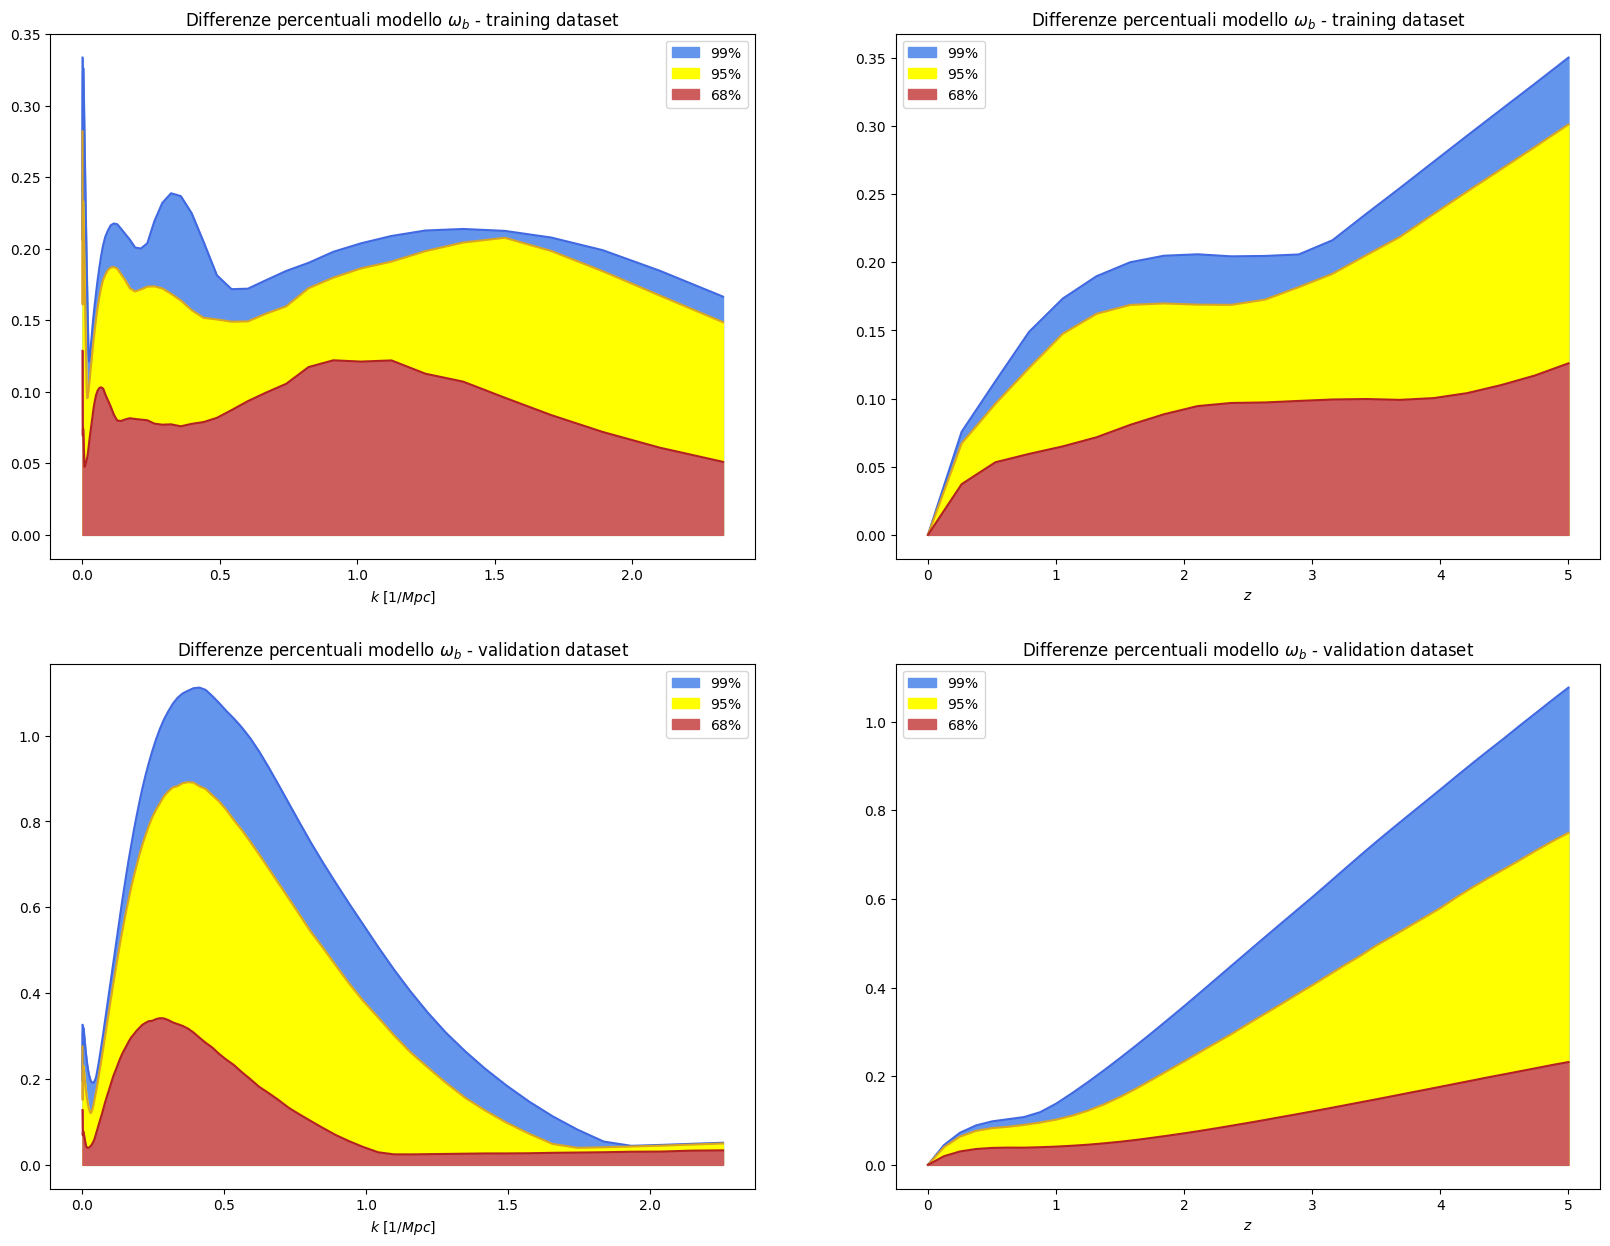

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

x = [[kk, zz], [kkv, zzv]]
diff = [[diffk_ob, diffz_ob], [diffk_ob_v, diffz_ob_v]]

for i in range(2) :
    for j in range(2) :
        ind99 = int((diff[i][j].shape[0]/100)*99)
        axs[i,j].plot(x[i][j], diff[i][j][ind99,:], color='royalblue')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind99,:], color='cornflowerblue', label='$99\%$')

        ind95 = int((diff[i][j].shape[0]/100)*95)
        axs[i,j].plot(x[i][j], diff[i][j][ind95,:], color='goldenrod')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind95,:], color='yellow', label='$95\%$')

        ind68 = int((diff[i][j].shape[0]/100)*68)
        axs[i,j].plot(x[i][j], diff[i][j][ind68,:], color='firebrick')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind68,:], color='indianred', label='$68\%$')

        axs[i,j].legend()
        axs[0,j].set_title('Differenze percentuali modello $\omega_b$ - training dataset')
        axs[1,j].set_title('Differenze percentuali modello $\omega_b$ - validation dataset')
        
        axs[i,0].set_xlabel('$k \ [1/Mpc]$')
        axs[i,1].set_xlabel('$z$')

plt.savefig('../plots/diff_ob.pdf')
plt.show()

# Modello con $\omega_c$

In [15]:
model_oc = PySRRegressor().from_file('../models/mu_oc(' +str(ni)+ ',' +str(comp)+ ',' +str(pop)+ ').pkl')
print(model_oc.get_best())
print(model_oc.latex())

Checking if ../models/mu_oc(1000,25,70).pkl exists...
Loading model from ../models/mu_oc(1000,25,70).pkl
complexity                                                      23
loss                                                      0.000002
score                                                     0.120859
equation         (((((x2 + 0.89721626) ^ 0.071755774) ^ (-0.651...
sympy_format     (((x2 + 0.89721626)**(0.144342429633878*x3 - 0...
lambda_format    PySRFunction(X=>(((x2 + 0.89721626)**(0.144342...
Name: 12, dtype: object
\left(\left(\left(x_{2} + 0.897\right)^{0.144 x_{3} - 0.0468}\right)^{x_{3}^{\frac{0.897 x_{1}}{x_{0}}}}\right)^{1.34 x_{0}}


* $x_0 = m_\nu$
* $x_1 = k$ 
* $x_2 = z$
* $x_3 = \omega_c$

$ \mu(k,z) = \left(0.984^{\left(\frac{x_{0}}{x_{3}} + 0.0172\right) \left(0.436^{\frac{e^{x_{3}}}{x_{0}}}\right)^{x_{1}}}\right)^{x_{2}^{x_{3}^{1.45 x_{3}}}} $

In [16]:
# preparo il plot delle differenze con il training dataset

data_oc = np.load('../files/data_oc_[' +str(nm)+ ',' +str(nk)+ ',' +str(nz)+ ',' +str(noc)+ '].npy')

diffk_oc = np.zeros([nm*noc*nz,nk])
diffz_oc = np.zeros([nm*noc*nk,nz])

testk_oc = data_oc[np.argsort(data_oc[:, 1])]
for i in range(nk) :
    diffk_oc[:,i] = 100*np.abs(1-model_oc.predict(testk_oc[i*nm*noc*nz:i*nm*noc*nz+nm*noc*nz,:-1])/testk_oc[i*nm*noc*nz:i*nm*noc*nz+nm*noc*nz,-1])
diffk_oc = np.sort(diffk_oc, axis=0)

testz_oc = data_oc[np.argsort(data_oc[:, 2])]
for i in range(nz) :
    diffz_oc[:,i] = 100*np.abs(1-model_oc.predict(testz_oc[i*nm*noc*nk:i*nm*noc*nk+nm*noc*nk,:-1])/testz_oc[i*nm*noc*nk:i*nm*noc*nk+nm*noc*nk,-1])
diffz_oc = np.sort(diffz_oc, axis=0)


In [17]:
# preparo il plot delle differenze con il validation dataset

data_oc_v = np.load('../files/data-val_oc_[' +str(nmv)+ ',' +str(nkv)+ ',' +str(nzv)+ ',' +str(nocv)+ '].npy')

diffk_oc_v = np.zeros([nmv*nocv*nzv,nkv])
diffz_oc_v = np.zeros([nmv*nocv*nkv,nzv])

testk_oc_v = data_oc_v[np.argsort(data_oc_v[:, 1])]
for i in range(nkv) :
    diffk_oc_v[:,i] = 100*np.abs(1-model_oc.predict(testk_oc_v[i*nmv*nocv*nzv:i*nmv*nocv*nzv+nmv*nocv*nzv,:-1])/testk_oc_v[i*nmv*nocv*nzv:i*nmv*nocv*nzv+nmv*nocv*nzv,-1])
diffk_oc_v = np.sort(diffk_oc_v, axis=0)

testz_oc_v = data_oc_v[np.argsort(data_oc_v[:, 2])]
for i in range(nzv) :
    diffz_oc_v[:,i] = 100*np.abs(1-model_oc.predict(testz_oc_v[i*nmv*nocv*nkv:i*nmv*nocv*nkv+nmv*nocv*nkv,:-1])/testz_oc_v[i*nmv*nocv*nkv:i*nmv*nocv*nkv+nmv*nocv*nkv,-1])
diffz_oc_v = np.sort(diffz_oc_v, axis=0)


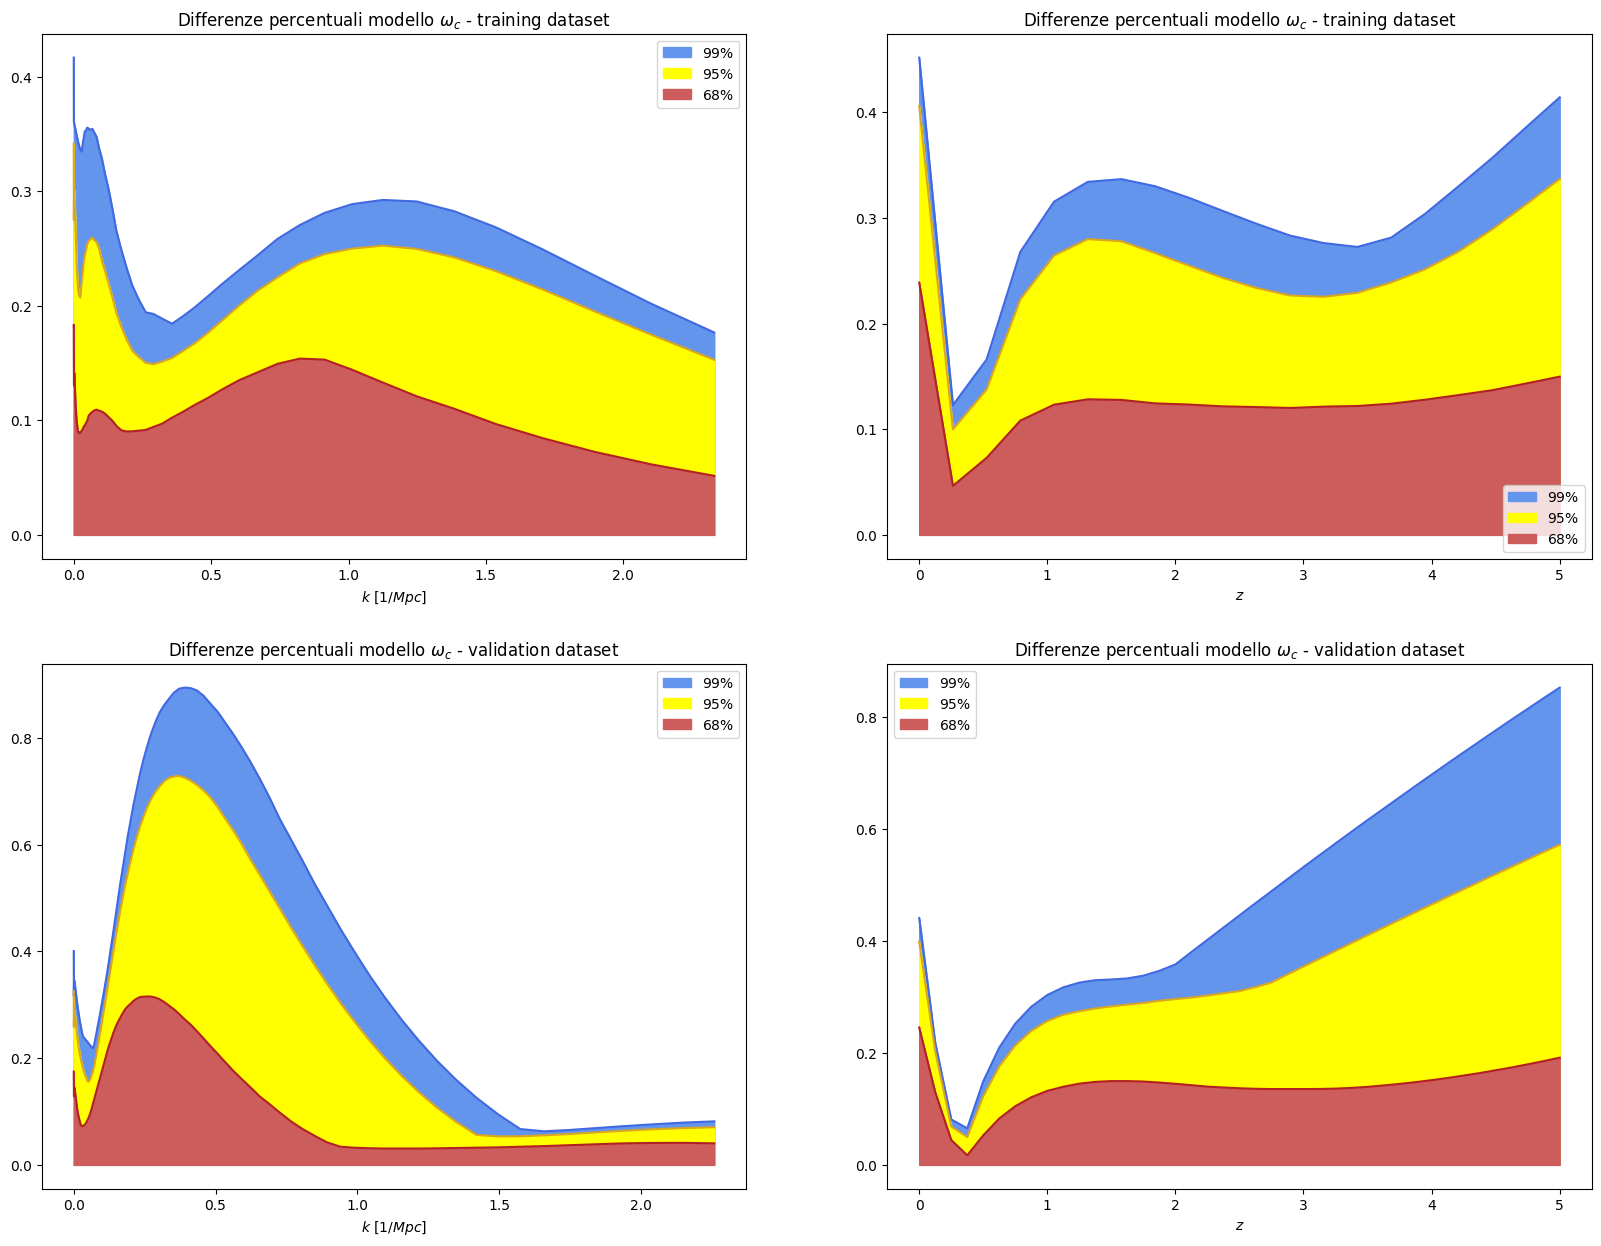

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

x = [[kk, zz], [kkv, zzv]]
diff = [[diffk_oc, diffz_oc], [diffk_oc_v, diffz_oc_v]]

for i in range(2) :
    for j in range(2) :
        ind99 = int((diff[i][j].shape[0]/100)*99)
        axs[i,j].plot(x[i][j], diff[i][j][ind99,:], color='royalblue')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind99,:], color='cornflowerblue', label='$99\%$')

        ind95 = int((diff[i][j].shape[0]/100)*95)
        axs[i,j].plot(x[i][j], diff[i][j][ind95,:], color='goldenrod')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind95,:], color='yellow', label='$95\%$')

        ind68 = int((diff[i][j].shape[0]/100)*68)
        axs[i,j].plot(x[i][j], diff[i][j][ind68,:], color='firebrick')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind68,:], color='indianred', label='$68\%$')

        axs[i,j].legend()
        axs[0,j].set_title('Differenze percentuali modello $\omega_c$ - training dataset')
        axs[1,j].set_title('Differenze percentuali modello $\omega_c$ - validation dataset')
        
        axs[i,0].set_xlabel('$k \ [1/Mpc]$')
        axs[i,1].set_xlabel('$z$')

plt.savefig('../plots/diff_oc.pdf')
plt.show()

# Modello con h

In [19]:
model_h = PySRRegressor().from_file('../models/mu_h(' +str(ni)+ ',' +str(comp)+ ',' +str(pop)+ ').pkl')
print(model_h.get_best())
print(model_h.latex())

Checking if ../models/mu_h(1000,25,70).pkl exists...
Loading model from ../models/mu_h(1000,25,70).pkl
complexity                                                      25
loss                                                      0.000001
score                                                     0.179767
equation         (((0.9867149 + (0.61836666 * x2)) ^ (x0 ^ 0.92...
sympy_format     ((0.61836666*x2 + 0.9867149)**(x0**0.9224356))...
lambda_format    PySRFunction(X=>((0.61836666*x2 + 0.9867149)**...
Name: 15, dtype: object
\left(\left(0.618 x_{2} + 0.987\right)^{x_{0}^{0.922}}\right)^{- 0.160 \cdot 0.207^{x_{3}^{x_{3}} - 0.0195 + \frac{x_{1}}{x_{0}}}}


* $x_0 = m_\nu$
* $x_1 = k$ 
* $x_2 = z$
* $x_3 = h$

$ \mu(k,z) = \left(0.984^{\left(x_{0} x_{2}^{x_{3}^{0.869}}\right)^{0.978^{x_{2}}}}\right)^{\frac{\left(0.0818^{\frac{x_{3}}{x_{0}}}\right)^{x_{1}}}{x_{3}}} $

In [20]:
# preparo il plot delle differenze con il training dataset

data_h = np.load('../files/data_h_[' +str(nm)+ ',' +str(nk)+ ',' +str(nz)+ ',' +str(nh)+ '].npy')

diffk_h = np.zeros([nm*nh*nz,nk])
diffz_h = np.zeros([nm*nh*nk,nz])

testk_h = data_h[np.argsort(data_h[:, 1])]
for i in range(nk) :
    diffk_h[:,i] = 100*np.abs(1-model_h.predict(testk_h[i*nm*nh*nz:i*nm*nh*nz+nm*nh*nz,:-1])/testk_h[i*nm*nh*nz:i*nm*nh*nz+nm*nh*nz,-1])
diffk_h = np.sort(diffk_h, axis=0)

testz_h = data_h[np.argsort(data_h[:, 2])]
for i in range(nz) :
    diffz_h[:,i] = 100*np.abs(1-model_h.predict(testz_h[i*nm*nh*nk:i*nm*nh*nk+nm*nh*nk,:-1])/testz_h[i*nm*nh*nk:i*nm*nh*nk+nm*nh*nk,-1])
diffz_h = np.sort(diffz_h, axis=0)


In [21]:
# preparo il plot delle differenze con il validation dataset

data_h_v = np.load('../files/data-val_h_[' +str(nmv)+ ',' +str(nkv)+ ',' +str(nzv)+ ',' +str(nhv)+ '].npy')

diffk_h_v = np.zeros([nmv*nhv*nzv,nkv])
diffz_h_v = np.zeros([nmv*nhv*nkv,nzv])

testk_h_v = data_h_v[np.argsort(data_h_v[:, 1])]
for i in range(nkv) :
    diffk_h_v[:,i] = 100*np.abs(1-model_h.predict(testk_h_v[i*nmv*nhv*nzv:i*nmv*nhv*nzv+nmv*nhv*nzv,:-1])/testk_h_v[i*nmv*nhv*nzv:i*nmv*nhv*nzv+nmv*nhv*nzv,-1])
diffk_h_v = np.sort(diffk_h_v, axis=0)

testz_h_v = data_h_v[np.argsort(data_h_v[:, 2])]
for i in range(nzv) :
    diffz_h_v[:,i] = 100*np.abs(1-model_h.predict(testz_h_v[i*nmv*nhv*nkv:i*nmv*nhv*nkv+nmv*nhv*nkv,:-1])/testz_h_v[i*nmv*nhv*nkv:i*nmv*nhv*nkv+nmv*nhv*nkv,-1])
diffz_h_v = np.sort(diffz_h_v, axis=0)


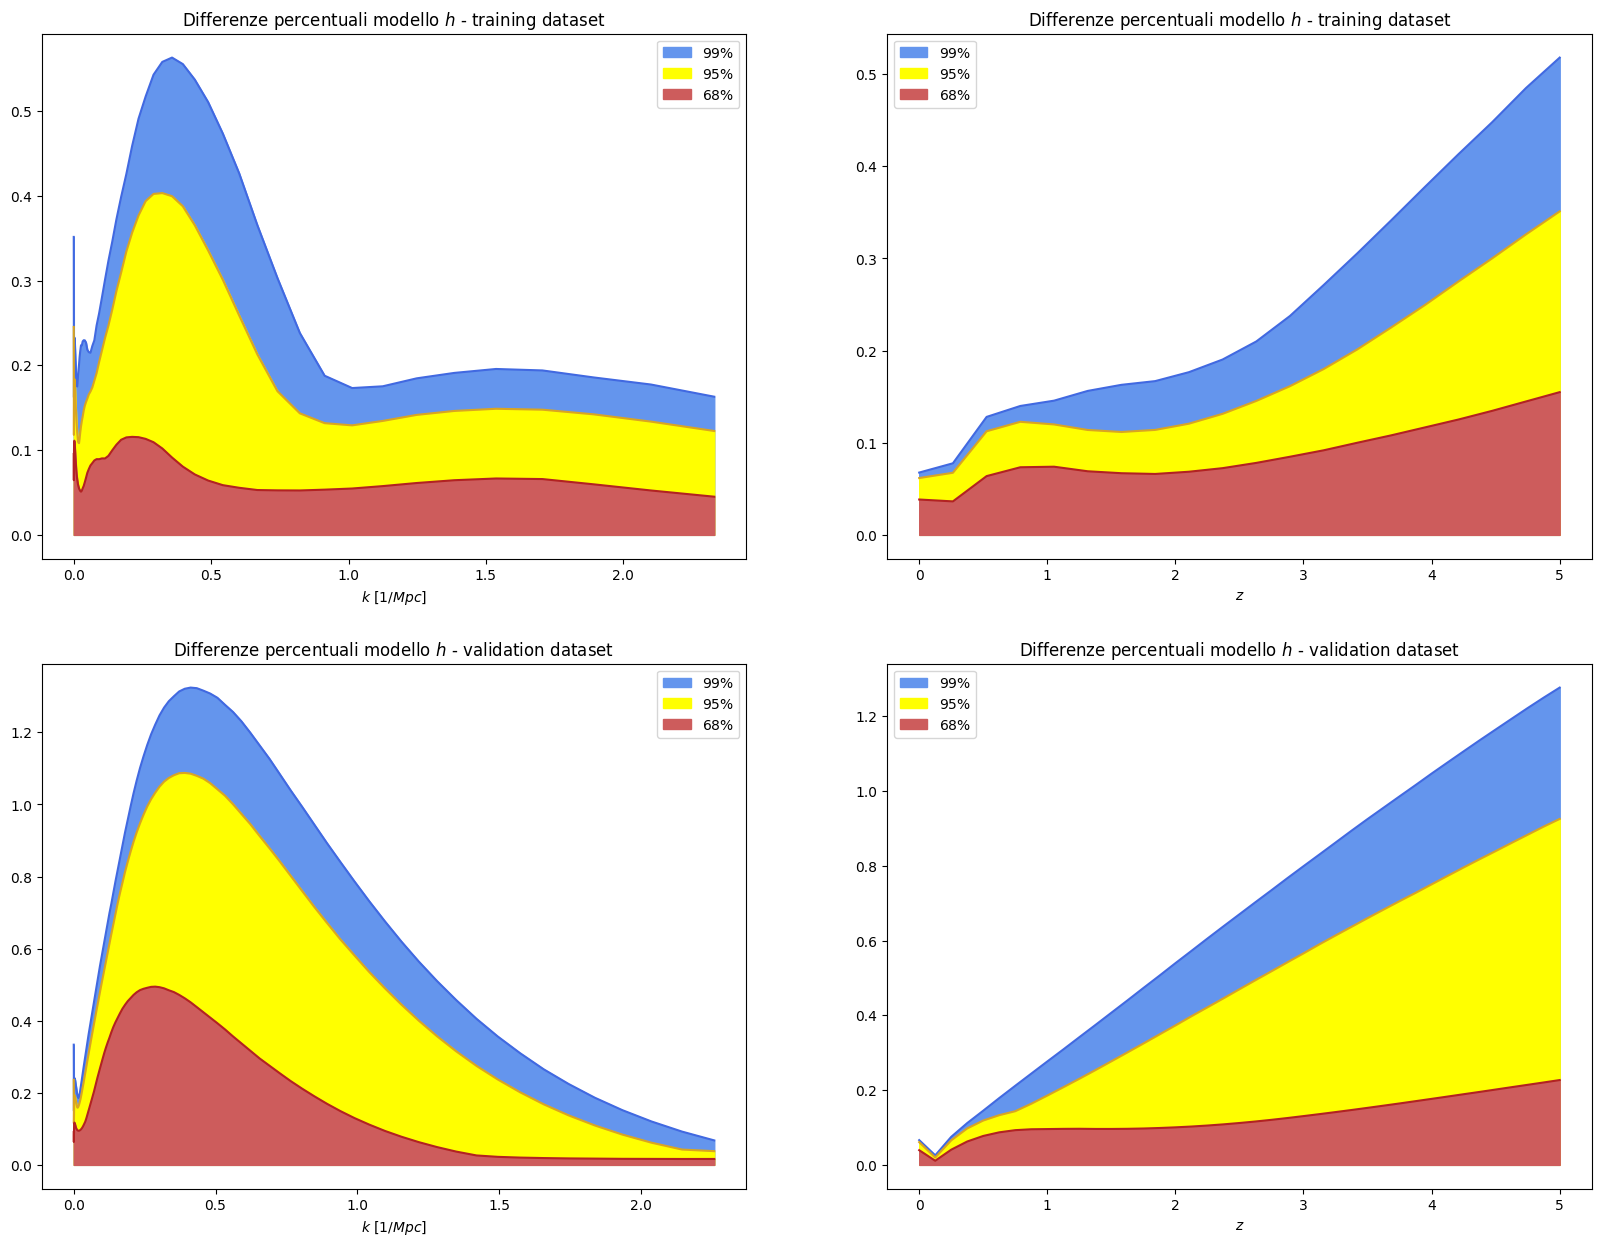

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

x = [[kk, zz], [kkv, zzv]]
diff = [[diffk_h, diffz_h], [diffk_h_v, diffz_h_v]]

for i in range(2) :
    for j in range(2) :
        ind99 = int((diff[i][j].shape[0]/100)*99)
        axs[i,j].plot(x[i][j], diff[i][j][ind99,:], color='royalblue')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind99,:], color='cornflowerblue', label='$99\%$')

        ind95 = int((diff[i][j].shape[0]/100)*95)
        axs[i,j].plot(x[i][j], diff[i][j][ind95,:], color='goldenrod')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind95,:], color='yellow', label='$95\%$')

        ind68 = int((diff[i][j].shape[0]/100)*68)
        axs[i,j].plot(x[i][j], diff[i][j][ind68,:], color='firebrick')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind68,:], color='indianred', label='$68\%$')

        axs[i,j].legend()
        axs[0,j].set_title('Differenze percentuali modello $h$ - training dataset')
        axs[1,j].set_title('Differenze percentuali modello $h$ - validation dataset')
        
        axs[i,0].set_xlabel('$k \ [1/Mpc]$')
        axs[i,1].set_xlabel('$z$')

plt.savefig('../plots/diff_h.pdf')
plt.show()

# Modello con $\omega_b$, $\omega_c$ e $h$

In [23]:
model_bch1 = PySRRegressor().from_file('../models/mu_bch(' +str(ni)+ ',' +str(comp)+ ',' +str(pop)+ ').pkl')
print(model_bch1.get_best())
print(model_bch1.latex())

Checking if ../models/mu_bch(1000,25,70).pkl exists...
Loading model from ../models/mu_bch(1000,25,70).pkl
complexity                                                      22
loss                                                      0.000002
score                                                     0.265015
equation         ((exp(-0.018632354 * (0.071348935 ^ (x1 / x0))...
sympy_format     (exp(-0.018632354*0.071348935**(x1/x0))**1.136...
lambda_format    PySRFunction(X=>(exp(-0.018632354*0.071348935*...
Name: 15, dtype: object
\left(\left(e^{- 0.0186 \cdot 0.0714^{\frac{x_{1}}{x_{0}}}}\right)^{1.14}\right)^{x_{2}^{0.744} \left(x_{0} - x_{4} + \frac{0.0188}{x_{4}}\right)}


$ \left(\left(e^{- 0.0186 \cdot 0.0714^{\frac{x_{1}}{x_{0}}}}\right)^{1.14}\right)^{x_{2}^{0.744} \left(x_{0} - x_{4} + \frac{0.0188}{x_{4}}\right)} $

In [24]:
# preparo il plot delle differenze con il training dataset

diffk_bch1 = np.zeros([nc*nz,nk])
diffz_bch1 = np.zeros([nc*nk,nz])

data_bch1 = np.load('../files/data_bch_[' +str(nk)+ ',' +str(nz)+ ',comb=' +str(nc)+ '].npy')

testk_bch1 = data_bch1[np.argsort(data_bch1[:, 1])]
for i in range(nk) :
    diffk_bch1[:,i] = 100*np.abs(1-model_bch1.predict(testk_bch1[i*nc*nz:i*nc*nz+nc*nz,:-1])/testk_bch1[i*nc*nz:i*nc*nz+nc*nz,-1])
diffk_bch1 = np.sort(diffk_bch1, axis=0)

testz_bch1 = data_bch1[np.argsort(data_bch1[:, 2])]
for i in range(nz) :
    diffz_bch1[:,i] = 100*np.abs(1-model_bch1.predict(testz_bch1[i*nc*nk:i*nc*nk+nc*nk,:-1])/testz_bch1[i*nc*nk:i*nc*nk+nc*nk,-1])
diffz_bch1 = np.sort(diffz_bch1, axis=0)


In [25]:
# preparo il plot delle differenze con il validation dataset

data_bch1_v = np.load('../files/data-val_bch_[' +str(nkv)+ ',' +str(nzv)+ ',comb=' +str(ncv)+ '].npy')

diffk_bch1_v = np.zeros([ncv*nzv,nkv])
diffz_bch1_v = np.zeros([ncv*nkv,nzv])

testk_bch1_v = data_bch1_v[np.argsort(data_bch1_v[:, 1])]
for i in range(nkv) :
    diffk_bch1_v[:,i] = 100*np.abs(1-model_bch1.predict(testk_bch1_v[i*ncv*nzv:i*ncv*nzv+ncv*nzv,:-1])/testk_bch1_v[i*ncv*nzv:i*ncv*nzv+ncv*nzv,-1])
diffk_bch1_v = np.sort(diffk_bch1_v, axis=0)

testz_bch1_v = data_bch1_v[np.argsort(data_bch1_v[:, 2])]
for i in range(nzv) :
    diffz_bch1_v[:,i] = 100*np.abs(1-model_bch1.predict(testz_bch1_v[i*ncv*nkv:i*ncv*nkv+ncv*nkv,:-1])/testz_bch1_v[i*ncv*nkv:i*ncv*nkv+ncv*nkv,-1])
diffz_bch1_v = np.sort(diffz_bch1_v, axis=0)


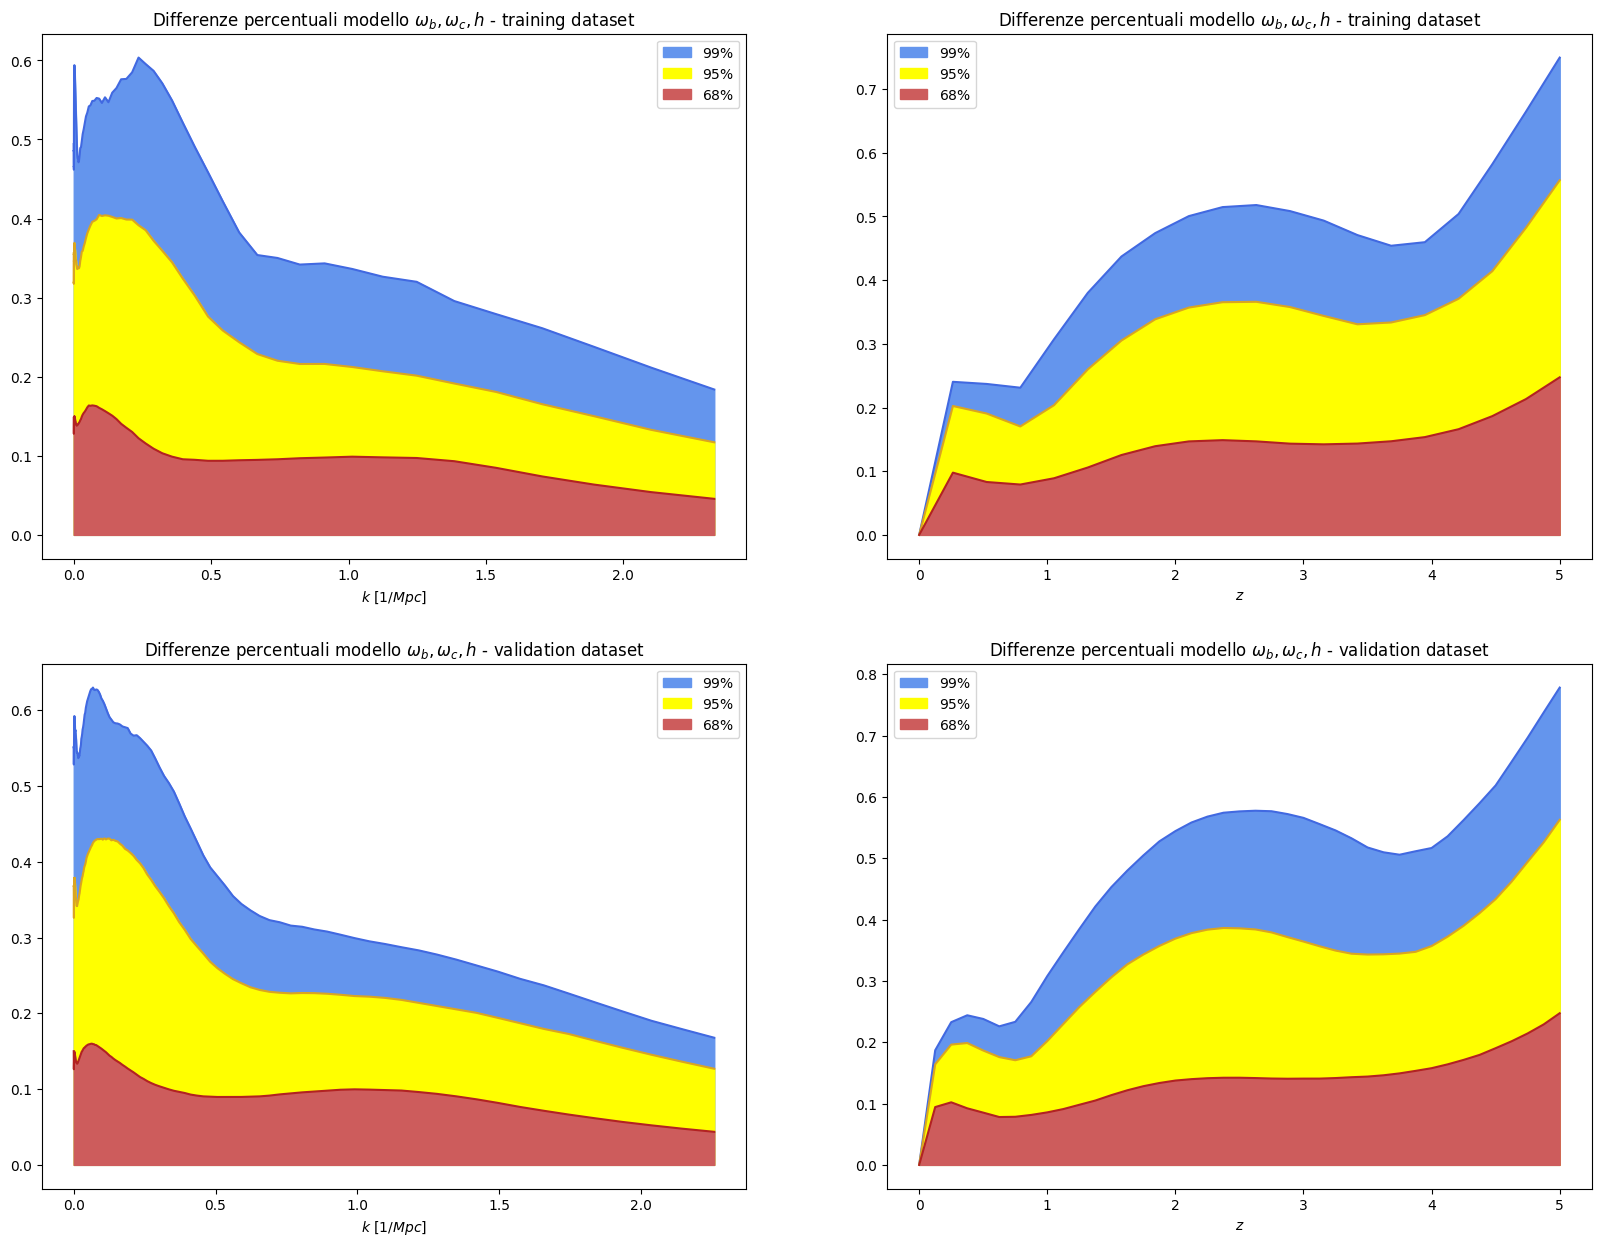

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

x = [[kk, zz], [kkv, zzv]]
diff = [[diffk_bch1, diffz_bch1], [diffk_bch1_v, diffz_bch1_v]]

for i in range(2) :
    for j in range(2) :
        ind99 = int((diff[i][j].shape[0]/100)*99)
        axs[i,j].plot(x[i][j], diff[i][j][ind99,:], color='royalblue')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind99,:], color='cornflowerblue', label='$99\%$')

        ind95 = int((diff[i][j].shape[0]/100)*95)
        axs[i,j].plot(x[i][j], diff[i][j][ind95,:], color='goldenrod')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind95,:], color='yellow', label='$95\%$')

        ind68 = int((diff[i][j].shape[0]/100)*68)
        axs[i,j].plot(x[i][j], diff[i][j][ind68,:], color='firebrick')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind68,:], color='indianred', label='$68\%$')

        axs[i,j].legend()
        axs[0,j].set_title('Differenze percentuali modello $\omega_b, \omega_c, h$ - training dataset')
        axs[1,j].set_title('Differenze percentuali modello $\omega_b, \omega_c, h$ - validation dataset')
        
        axs[i,0].set_xlabel('$k \ [1/Mpc]$')
        axs[i,1].set_xlabel('$z$')

plt.savefig('../plots/diff_bch1.pdf')
plt.show()

In [27]:
ni = 2000
comp = 30
pop = 100

nc = 500

In [28]:
model_bch2 = PySRRegressor().from_file('../models/mu_bch(' +str(ni)+ ',' +str(comp)+ ',' +str(pop)+ ').pkl')
print(model_bch2.get_best())
print(model_bch2.latex())

Checking if ../models/mu_bch(2000,30,100).pkl exists...
Loading model from ../models/mu_bch(2000,30,100).pkl
complexity                                                      21
loss                                                      0.000002
score                                                     0.065701
equation         (0.9818964 ^ ((((x2 / 0.4618551) ^ 0.70079356)...
sympy_format     0.9818964**(1.71835232265824*x2**0.70079356*(x...
lambda_format    PySRFunction(X=>0.9818964**(1.71835232265824*x...
Name: 12, dtype: object
0.982^{1.72 x_{2}^{0.701} \left(x_{0} + 0.0284\right) \left(x_{3}^{x_{5}}\right)^{x_{4} + \frac{x_{1}}{x_{0}}}}


$0.982^{1.72 x_{2}^{0.701} \left(x_{0} + 0.0284\right) \left(x_{3}^{x_{5}}\right)^{x_{4} + \frac{x_{1}}{x_{0}}}}$

In [29]:
# preparo il plot delle differenze con il training dataset

diffk_bch2 = np.zeros([nc*nz,nk])
diffz_bch2 = np.zeros([nc*nk,nz])

data_bch2 = np.load('../files/data_bch_[' +str(nk)+ ',' +str(nz)+ ',comb=' +str(nc)+ '].npy')

testk_bch2 = data_bch2[np.argsort(data_bch2[:, 1])]
for i in range(nk) :
    diffk_bch2[:,i] = 100*np.abs(1-model_bch2.predict(testk_bch2[i*nc*nz:i*nc*nz+nc*nz,:-1])/testk_bch2[i*nc*nz:i*nc*nz+nc*nz,-1])
diffk_bch2 = np.sort(diffk_bch2, axis=0)

testz_bch2 = data_bch2[np.argsort(data_bch2[:, 2])]
for i in range(nz) :
    diffz_bch2[:,i] = 100*np.abs(1-model_bch2.predict(testz_bch2[i*nc*nk:i*nc*nk+nc*nk,:-1])/testz_bch2[i*nc*nk:i*nc*nk+nc*nk,-1])
diffz_bch2 = np.sort(diffz_bch2, axis=0)


In [30]:
# preparo il plot delle differenze con il validation dataset

data_bch2_v = np.load('../files/data-val_bch_[' +str(nkv)+ ',' +str(nzv)+ ',comb=' +str(ncv)+ '].npy')

diffk_bch2_v = np.zeros([ncv*nzv,nkv])
diffz_bch2_v = np.zeros([ncv*nkv,nzv])

testk_bch2_v = data_bch2_v[np.argsort(data_bch2_v[:, 1])]
for i in range(nkv) :
    diffk_bch2_v[:,i] = 100*np.abs(1-model_bch2.predict(testk_bch2_v[i*ncv*nzv:i*ncv*nzv+ncv*nzv,:-1])/testk_bch2_v[i*ncv*nzv:i*ncv*nzv+ncv*nzv,-1])
diffk_bch2_v = np.sort(diffk_bch2_v, axis=0)

testz_bch2_v = data_bch2_v[np.argsort(data_bch2_v[:, 2])]
for i in range(nzv) :
    diffz_bch2_v[:,i] = 100*np.abs(1-model_bch2.predict(testz_bch2_v[i*ncv*nkv:i*ncv*nkv+ncv*nkv,:-1])/testz_bch2_v[i*ncv*nkv:i*ncv*nkv+ncv*nkv,-1])
diffz_bch2_v = np.sort(diffz_bch2_v, axis=0)


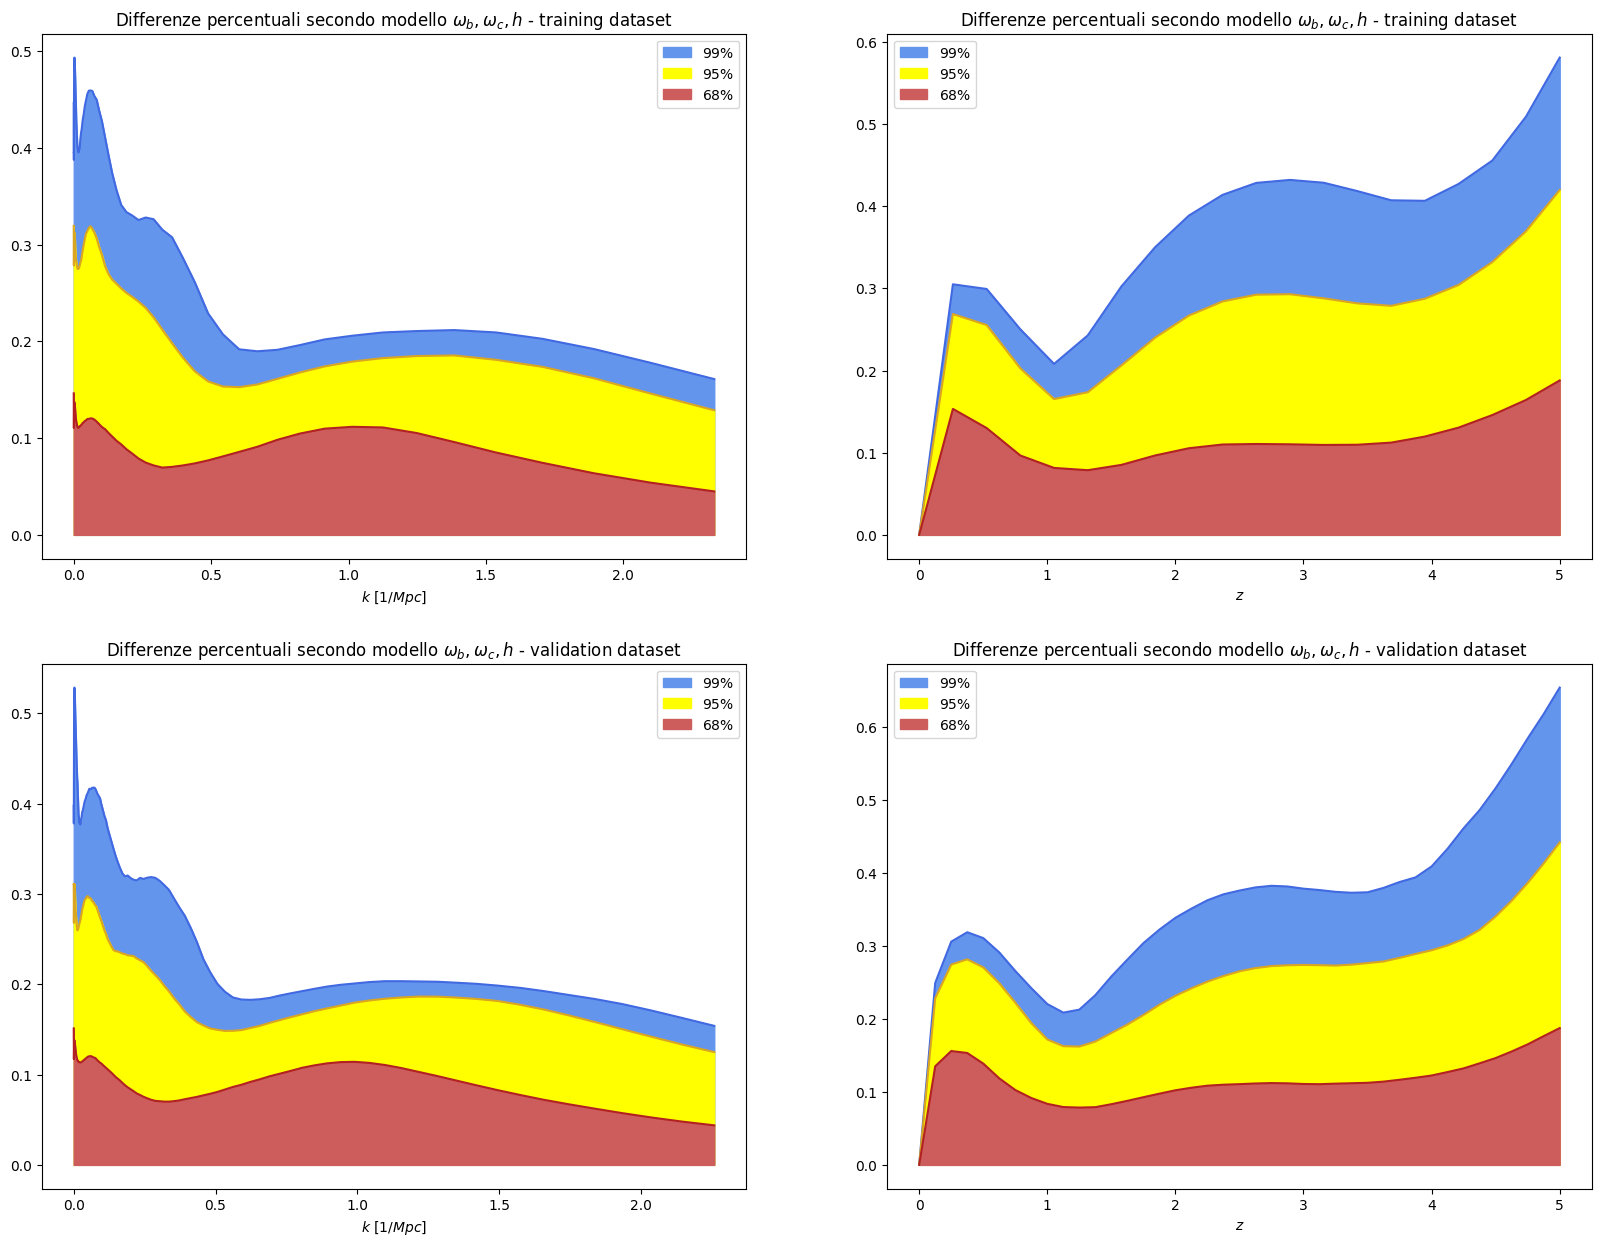

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

x = [[kk, zz], [kkv, zzv]]
diff = [[diffk_bch2, diffz_bch2], [diffk_bch2_v, diffz_bch2_v]]

for i in range(2) :
    for j in range(2) :
        ind99 = int((diff[i][j].shape[0]/100)*99)
        axs[i,j].plot(x[i][j], diff[i][j][ind99,:], color='royalblue')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind99,:], color='cornflowerblue', label='$99\%$')

        ind95 = int((diff[i][j].shape[0]/100)*95)
        axs[i,j].plot(x[i][j], diff[i][j][ind95,:], color='goldenrod')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind95,:], color='yellow', label='$95\%$')

        ind68 = int((diff[i][j].shape[0]/100)*68)
        axs[i,j].plot(x[i][j], diff[i][j][ind68,:], color='firebrick')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind68,:], color='indianred', label='$68\%$')

        axs[i,j].legend()
        axs[0,j].set_title('Differenze percentuali secondo modello $\omega_b, \omega_c, h$ - training dataset')
        axs[1,j].set_title('Differenze percentuali secondo modello $\omega_b, \omega_c, h$ - validation dataset')
        
        axs[i,0].set_xlabel('$k \ [1/Mpc]$')
        axs[i,1].set_xlabel('$z$')

plt.savefig('../plots/diff_bch2.pdf')
plt.show()

# Modello con $\Omega_\nu$, $\Omega_b$, $\Omega_c$ e $h$

In [32]:
model_otherbase = PySRRegressor().from_file('../models/mu_bch_otherbase(' +str(ni)+ ',' +str(comp)+ ',' +str(pop)+ ').pkl')
print(model_otherbase.get_best())
print(model_otherbase.latex())

Checking if ../models/mu_bch_otherbase(2000,30,100).pkl exists...
Loading model from ../models/mu_bch_otherbase(2000,30,100).pkl
complexity                                                      24
loss                                                      0.000001
score                                                     0.173359
equation         exp(x0 / ((((-0.86071676 / (x2 - x0)) + 0.0938...
sympy_format     exp(x0/(-x4 - (x1**(x4 + x5)*x3/x0)**1.6968098...
lambda_format    PySRFunction(X=>exp(x0/(-x4 - (x1**(x4 + x5)*x...
Name: 18, dtype: object
e^{\frac{x_{0}}{- x_{4} - \left(\frac{x_{1}^{x_{4} + x_{5}} x_{3}}{x_{0}}\right)^{1.70} + 0.0938 - \frac{0.861}{- x_{0} + x_{2}}}}


$e^{\frac{x_{0}}{- x_{4} - \left(\frac{x_{1}^{x_{4} + x_{5}} x_{3}}{x_{0}}\right)^{1.70} + 0.0938 - \frac{0.861}{- x_{0} + x_{2}}}}$

In [33]:
# preparo il plot delle differenze con il training dataset

diffk_otherbase = np.zeros([nc*nz,nk])
diffz_otherbase = np.zeros([nc*nk,nz])

data_otherbase = np.load('../files/data_otherbase_[' +str(nk)+ ',' +str(nz)+ ',comb=' +str(nc)+ '].npy')

testk_otherbase = data_otherbase[np.argsort(data_otherbase[:, 1])]
for i in range(nk) :
    diffk_otherbase[:,i] = 100*np.abs(1-model_otherbase.predict(testk_otherbase[i*nc*nz:i*nc*nz+nc*nz,:-1])/testk_otherbase[i*nc*nz:i*nc*nz+nc*nz,-1])
diffk_otherbase = np.sort(diffk_otherbase, axis=0)

testz_otherbase = data_otherbase[np.argsort(data_otherbase[:, 2])]
for i in range(nz) :
    diffz_otherbase[:,i] = 100*np.abs(1-model_otherbase.predict(testz_otherbase[i*nc*nk:i*nc*nk+nc*nk,:-1])/testz_otherbase[i*nc*nk:i*nc*nk+nc*nk,-1])
diffz_otherbase = np.sort(diffz_otherbase, axis=0)


In [34]:
# preparo il plot delle differenze con il validation dataset

data_otherbase_v = np.load('../files/data-val_otherbase_[' +str(nkv)+ ',' +str(nzv)+ ',comb=' +str(ncv)+ '].npy')

diffk_otherbase_v = np.zeros([ncv*nzv,nkv])
diffz_otherbase_v = np.zeros([ncv*nkv,nzv])

testk_otherbase_v = data_otherbase_v[np.argsort(data_otherbase_v[:, 1])]
for i in range(nkv) :
    diffk_otherbase_v[:,i] = 100*np.abs(1-model_otherbase.predict(testk_otherbase_v[i*ncv*nzv:i*ncv*nzv+ncv*nzv,:-1])/testk_otherbase_v[i*ncv*nzv:i*ncv*nzv+ncv*nzv,-1])
diffk_otherbase_v = np.sort(diffk_otherbase_v, axis=0)

testz_otherbase_v = data_otherbase_v[np.argsort(data_otherbase_v[:, 2])]
for i in range(nzv) :
    diffz_otherbase_v[:,i] = 100*np.abs(1-model_otherbase.predict(testz_otherbase_v[i*ncv*nkv:i*ncv*nkv+ncv*nkv,:-1])/testz_otherbase_v[i*ncv*nkv:i*ncv*nkv+ncv*nkv,-1])
diffz_otherbase_v = np.sort(diffz_otherbase_v, axis=0)


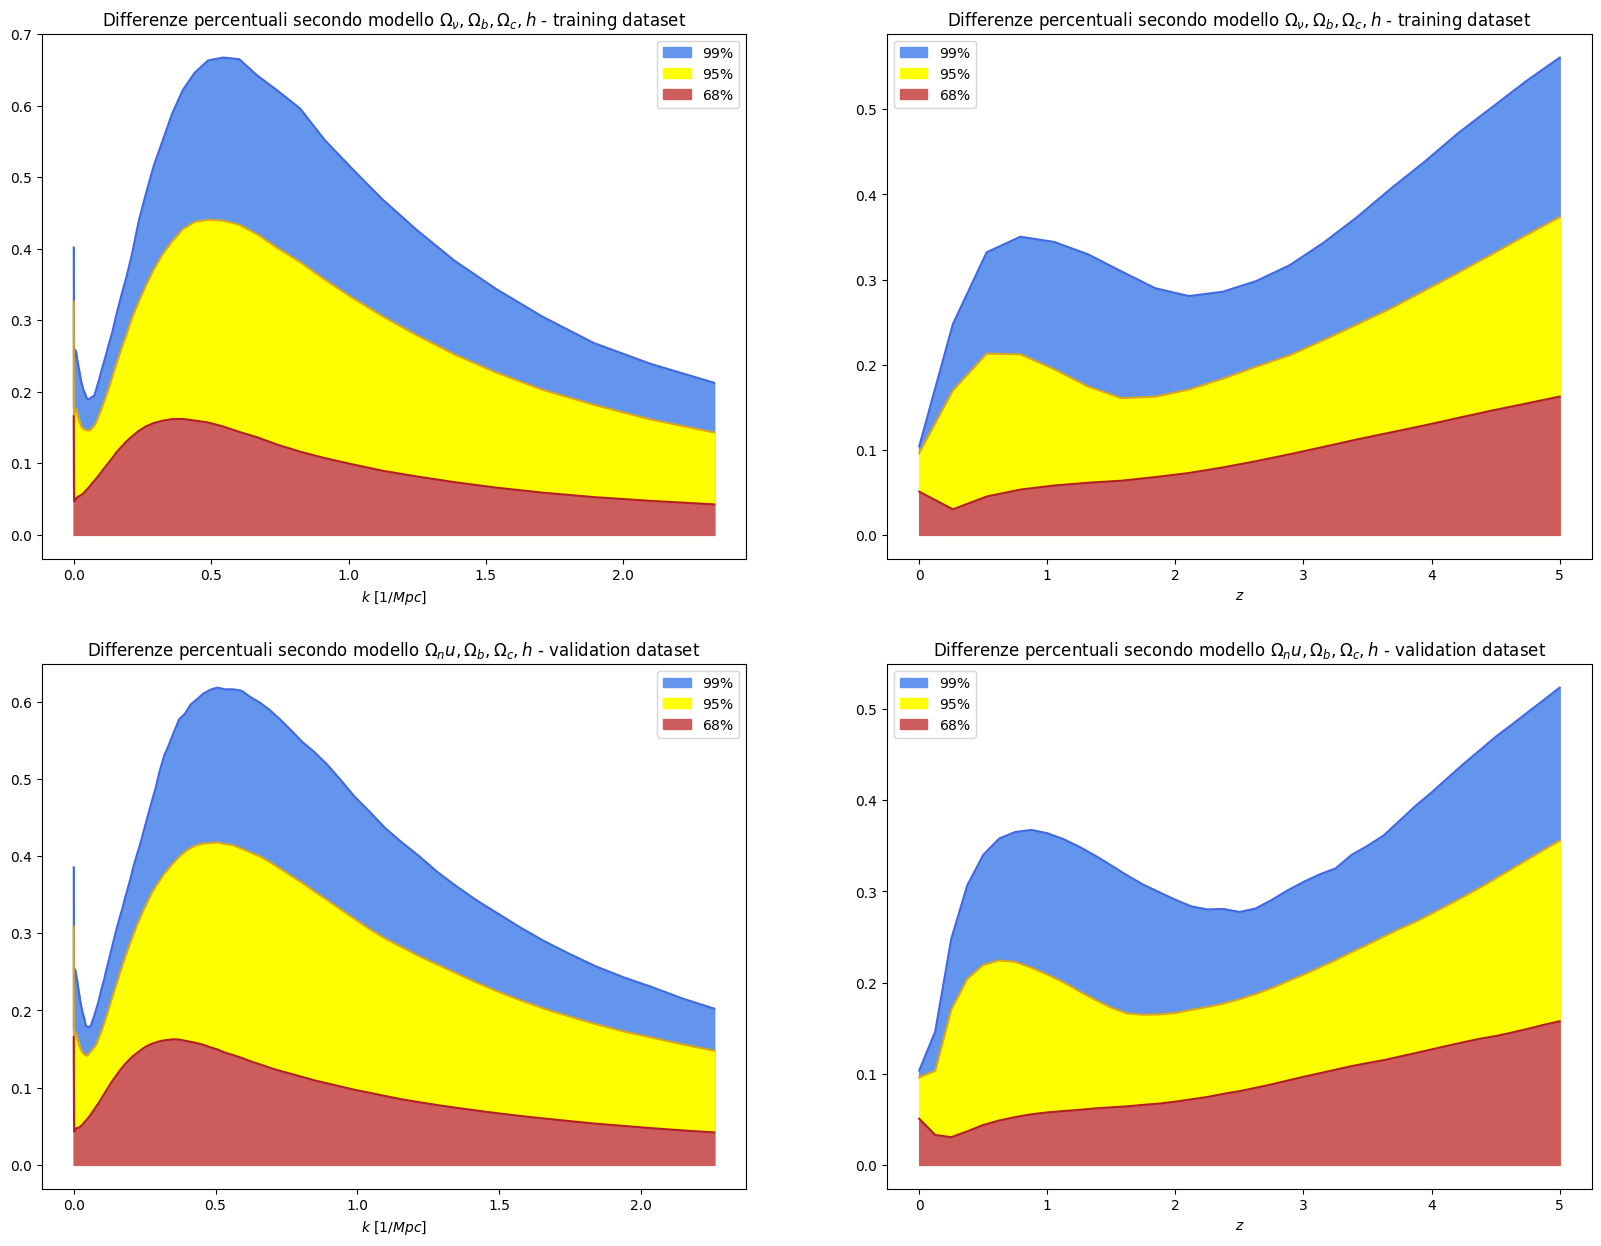

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

x = [[kk, zz], [kkv, zzv]]
diff = [[diffk_otherbase, diffz_otherbase], [diffk_otherbase_v, diffz_otherbase_v]]

for i in range(2) :
    for j in range(2) :
        ind99 = int((diff[i][j].shape[0]/100)*99)
        axs[i,j].plot(x[i][j], diff[i][j][ind99,:], color='royalblue')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind99,:], color='cornflowerblue', label='$99\%$')

        ind95 = int((diff[i][j].shape[0]/100)*95)
        axs[i,j].plot(x[i][j], diff[i][j][ind95,:], color='goldenrod')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind95,:], color='yellow', label='$95\%$')

        ind68 = int((diff[i][j].shape[0]/100)*68)
        axs[i,j].plot(x[i][j], diff[i][j][ind68,:], color='firebrick')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind68,:], color='indianred', label='$68\%$')

        axs[i,j].legend()
        axs[0,j].set_title(r'Differenze percentuali secondo modello $\Omega_\nu, \Omega_b, \Omega_c, h$ - training dataset')
        axs[1,j].set_title(r'Differenze percentuali secondo modello $\Omega_nu, \Omega_b, \Omega_c, h$ - validation dataset')
        
        axs[i,0].set_xlabel('$k \ [1/Mpc]$')
        axs[i,1].set_xlabel('$z$')

plt.savefig('../plots/diff_otherbase.pdf')
plt.show()